# GHG Emission Target

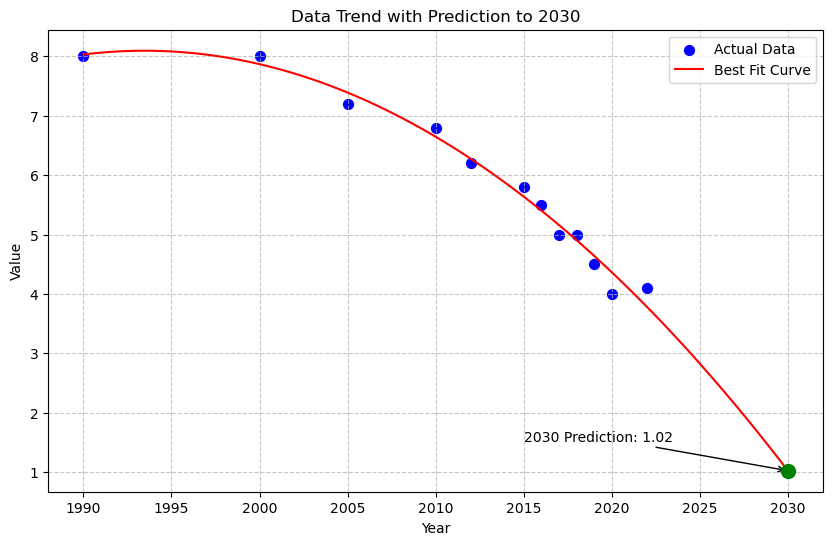

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
years = [1990, 2000, 2005, 2010, 2012, 2015, 2016, 2017, 2018, 2019, 2020, 2022]
values = [8.0, 8.0, 7.2, 6.8, 6.2, 5.8, 5.5, 5.0, 5.0, 4.5, 4.0, 4.1]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(years, values, color='blue', s=50, label='Actual Data')

# Try a polynomial fit instead of exponential decay
def poly_func(x, a, b, c):
    return a * (x - 1990)**2 + b * (x - 1990) + c

# Fit curve with polynomial function
popt, _ = curve_fit(poly_func, years, values)

# Generate points for smooth curve, including prediction to 2030
years_extended = np.linspace(1990, 2030, 100)
predicted_values = poly_func(years_extended, *popt)

# Plot the fitted curve
plt.plot(years_extended, predicted_values, 'r-', label='Best Fit Curve')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Data Trend with Prediction to 2030')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Highlight 2030 prediction
prediction_2030 = poly_func(2030, *popt)
plt.scatter(2030, prediction_2030, color='green', s=100, zorder=5)
plt.annotate(f'2030 Prediction: {prediction_2030:.2f}', 
             (2030, prediction_2030),
             xytext=(2015, prediction_2030+0.5),
             arrowprops=dict(arrowstyle='->'))

plt.show()

## With line of best fit

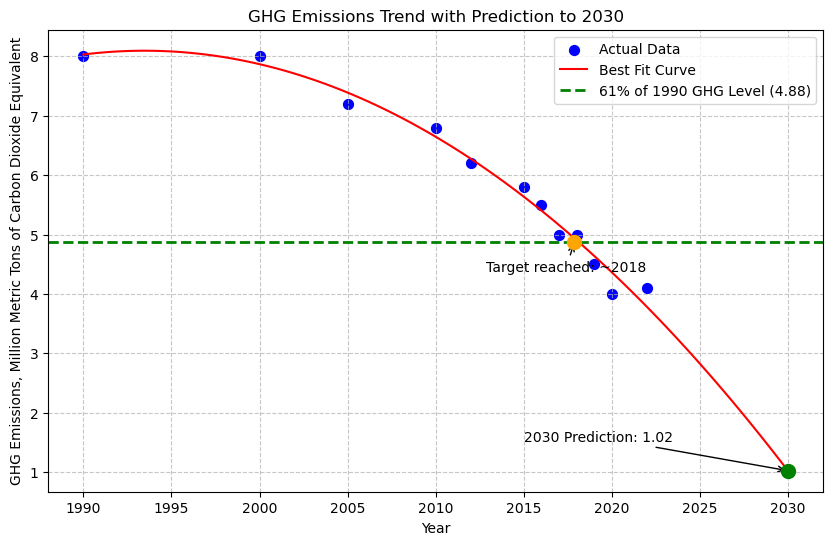

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
years = [1990, 2000, 2005, 2010, 2012, 2015, 2016, 2017, 2018, 2019, 2020, 2022]
values = [8.0, 8.0, 7.2, 6.8, 6.2, 5.8, 5.5, 5.0, 5.0, 4.5, 4.0, 4.1]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(years, values, color='blue', s=50, label='Actual Data')

# Try a polynomial fit instead of exponential decay
def poly_func(x, a, b, c):
    return a * (x - 1990)**2 + b * (x - 1990) + c

# Fit curve with polynomial function
popt, _ = curve_fit(poly_func, years, values)

# Generate points for smooth curve, including prediction to 2030
years_extended = np.linspace(1990, 2030, 100)
predicted_values = poly_func(years_extended, *popt)

# Plot the fitted curve
plt.plot(years_extended, predicted_values, 'r-', label='Best Fit Curve')

# Calculate 61% of 1990 GHG emission value
target_value = 0.61 * values[0]  # 61% of 1990 value

# Draw horizontal line at 61% of 1990 GHG value
plt.axhline(y=target_value, color='green', linestyle='--', linewidth=2, 
            label=f'61% of 1990 GHG Level ({target_value:.2f})')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('GHG Emissions, Million Metric Tons of Carbon Dioxide Equivalent')
plt.title('GHG Emissions Trend with Prediction to 2030')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Highlight 2030 prediction
prediction_2030 = poly_func(2030, *popt)
plt.scatter(2030, prediction_2030, color='green', s=100, zorder=5)
plt.annotate(f'2030 Prediction: {prediction_2030:.2f}', 
             (2030, prediction_2030),
             xytext=(2015, prediction_2030+0.5),
             arrowprops=dict(arrowstyle='->'))

# Show the intersection of the best fit curve with the 61% target line
intersection_years = []
for i in range(len(years_extended)-1):
    if (predicted_values[i] - target_value) * (predicted_values[i+1] - target_value) <= 0:
        intersection_years.append(years_extended[i])

if intersection_years:
    plt.scatter(intersection_years[0], target_value, color='orange', s=100, zorder=5)
    plt.annotate(f'Target reached: ~{intersection_years[0]:.0f}', 
                (intersection_years[0], target_value),
                xytext=(intersection_years[0]-5, target_value-0.5),
                arrowprops=dict(arrowstyle='->'))

plt.show()

# Log Function

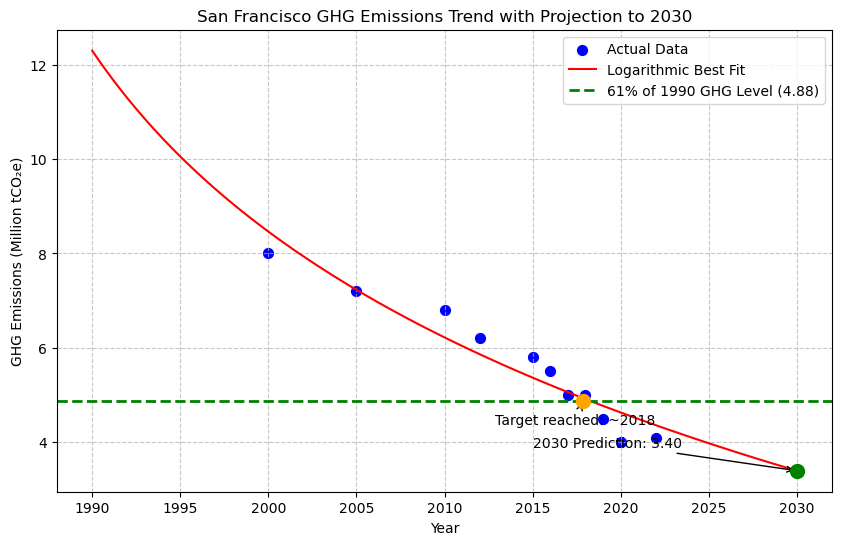

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
years = [2000, 2005, 2010, 2012, 2015, 2016, 2017, 2018, 2019, 2020, 2022]
values = [8.0, 7.2, 6.8, 6.2, 5.8, 5.5, 5.0, 5.0, 4.5, 4.0, 4.1]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(years, values, color='blue', s=50, label='Actual Data')

# Using a modified logarithmic function (more stable than hyperbolic)
def log_func(x, a, b, c):
    return -a * np.log(b * (x - 1980)) + c

# Fit curve with logarithmic function
# Increase maxfev to allow more iterations for convergence
popt, _ = curve_fit(log_func, years, values, p0=[1, 0.1, 8], maxfev=5000)

# Generate points for smooth curve, including prediction to 2030
years_extended = np.linspace(1990, 2030, 100)
predicted_values = log_func(years_extended, *popt)

# Plot the fitted curve
plt.plot(years_extended, predicted_values, 'r-', label='Logarithmic Best Fit')

# Calculate 61% of 1990 GHG emission value
target_value = 0.61 * values[0]  # 61% of 1990 value (4.88)

# Draw horizontal line at 61% of 1990 GHG value
plt.axhline(y=target_value, color='green', linestyle='--', linewidth=2, 
            label=f'61% of 1990 GHG Level ({target_value:.2f})')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('GHG Emissions (Million tCO₂e)')
plt.title('San Francisco GHG Emissions Trend with Projection to 2030')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Highlight 2030 prediction
prediction_2030 = log_func(2030, *popt)
plt.scatter(2030, prediction_2030, color='green', s=100, zorder=5)
plt.annotate(f'2030 Prediction: {prediction_2030:.2f}', 
             (2030, prediction_2030),
             xytext=(2015, prediction_2030+0.5),
             arrowprops=dict(arrowstyle='->'))

# Find intersection with target line
try:
    intersection_years = []
    for i in range(len(years_extended)-1):
        if (predicted_values[i] - target_value) * (predicted_values[i+1] - target_value) <= 0:
            intersection_years.append(years_extended[i])

    if intersection_years:
        plt.scatter(intersection_years[0], target_value, color='orange', s=100, zorder=5)
        plt.annotate(f'Target reached: ~{intersection_years[0]:.0f}', 
                    (intersection_years[0], target_value),
                    xytext=(intersection_years[0]-5, target_value-0.5),
                    arrowprops=dict(arrowstyle='->'))
except:
    pass

plt.show()